# Nguyễn Ngọc Đạt - 11200745

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_multilabel_classification
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

# 1, Implement KMean algorithm by Numpy

In [2]:
 class KMeans:
        def __init__(self, n_clusters=3, epoch=100):
         # initialize hyperparameter values
            self.n_clusters = n_clusters
            self.epoch = epoch
 
        def fit(self, X_train):
             # read in the data
            self.X_train = X_train
            # number of training observations
            self.n_train = X_train.shape[0]
            # initialize with random centroids (cannot exceed training boundaries)
            min_, max_ = np.min(self.X_train, axis=0), np.max(self.X_train, axis=0)
            centroids = [
                np.random.uniform(min_, max_) for _ in range(self.n_clusters)
            ] # this generates n_clusters points with the correct dimensions

            # train for given number of epochs
            for i in range(self.epoch):
                centroids = self.update_centroids(centroids)
            # add final centroids to model attributes
            self.centroids = centroids
            return self

        def update_centroids(self, centroids):
            # store cluster labels of training data
            clusters = np.zeros(self.n_train)
            # assign each training data point to closest centroid
            for i in range(self.n_train):
                p = self.X_train[i]  # isolate a data point
                dists = [self.euclidean(p, centroid) for centroid in centroids]
                clusters[i] = np.argmin(dists)  # index of closest centroid is cluster label
            # update centroids by averaging points in given cluster
            for i in range(self.n_clusters):
                # all points assigned to given cluster
                points = self.X_train[np.array(clusters) == i]
                # update new centroid to be the average point
                centroids[i] = points.mean(axis=0)

            return centroids

        def euclidean(self, p1, p2):
            # compute Eucleadian distance between two points
            return np.sqrt(np.sum((p1 - p2) ** 2))

        def predict(self, X_test):
            # read test data
            self.X_test = X_test
            # number of test observations
            self.n_test = X_test.shape[0]
            # store cluster labels of test data
            clusters = np.zeros(self.n_test)
            # assign each test data point to closest centroid
            for i in range(self.n_test):
                p = self.X_test[i]
                dists = [self.euclidean(p, centroid) for centroid in self.centroids]
                clusters[i] = np.argmin(dists)
            # return predicted clusters of test data
            return clusters
        
        def get_centroid(self):
            return self.centroids

# 2, Create at least three toy dataset,  then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

# 3, Drawing the elbow for the above dataset.

### - Apply KMean algorithm and draw the elbow for the first toy dataset

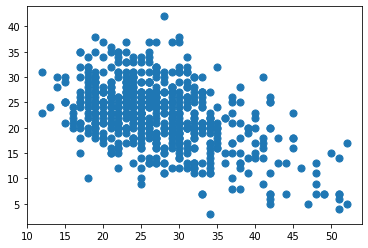

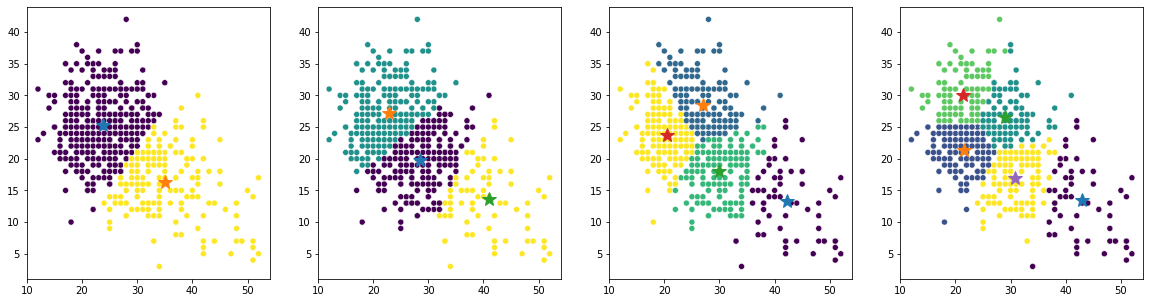

In [3]:
K = [2, 3, 4, 5]

X, y = make_multilabel_classification(n_samples=610, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

fig, ax = plt.subplots(1,4, figsize=(20,5))
i = 0
for _k in K :
    k = KMeans(_k)
    k.fit(X)
    y_kmeans = k.predict(X)
    sns.scatterplot(X[:, 0], X[:, 1], c = y_kmeans ,ax = ax[i])

    centroids = k.get_centroid()
    for centroid in centroids:
        ax[i].plot(centroid[0], centroid[1], '*', markersize=15)
        
    i+=1

plt.show()

In [4]:
from scipy.spatial.distance import cdist

losses = []
K = 10
for i in range(1, K):
    kmeans_i = KMeans(n_clusters=i)
    kmeans_i.fit(X)
  # 2. Tính _hàm biến dạng_
  # 2.1. Khoảng cách tới toàn bộ centroids
    d2centroids = cdist(X, kmeans_i.get_centroid(), 'euclidean') # shape (n, k)
  # 2.2. Khoảng cách tới centroid gần nhất
    min_distance = np.min(d2centroids, axis=1) # shape (n)
    loss = np.sum(min_distance)
    losses.append(loss)

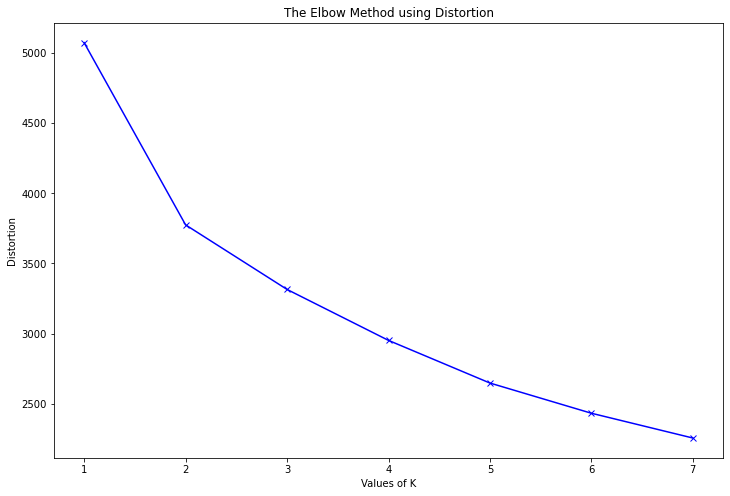

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### - Apply KMean algorithm and draw the elbow for the second toy dataset

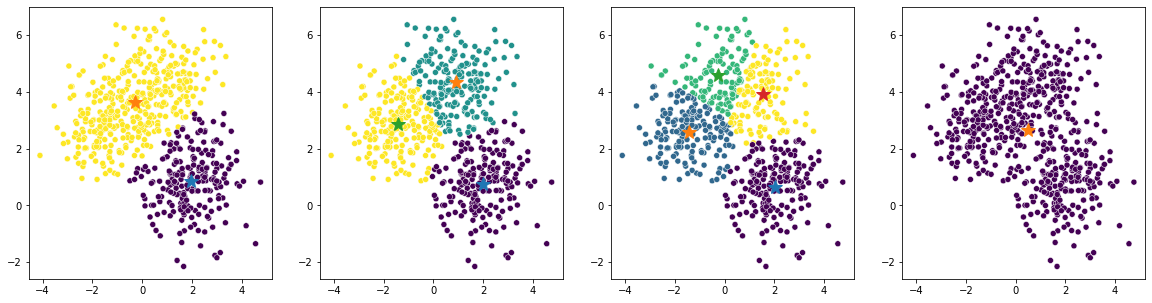

In [6]:
K = [2, 3, 4, 5]

X, y = make_blobs(n_samples=610, n_features=2, random_state=0)

fig, ax = plt.subplots(1,4, figsize=(20, 5))
i = 0 
for _k in K:
    k = KMeans(_k)
    k.fit(X)
    y_kmeans = k.predict(X)
    sns.scatterplot(X[:, 0], X[:, 1],c=y_kmeans, ax= ax[i])

    centroid = k.get_centroid()
    for point in centroid:
        ax[i].plot(point[0], point[1], '*', markersize=15)
    i+=1

plt.show()

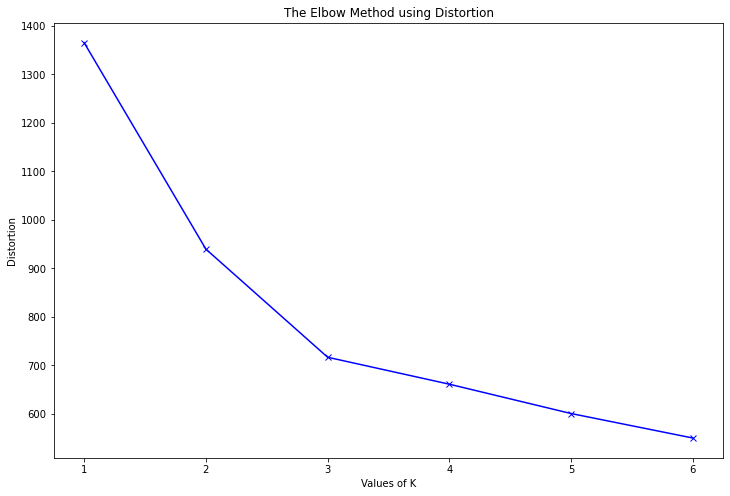

In [7]:
losses = []
K = 10
for i in range(1, K):
    kmeans_i = KMeans(n_clusters=i)
    kmeans_i.fit(X)
  # 2. Tính _hàm biến dạng_
  # 2.1. Khoảng cách tới toàn bộ centroids
    d2centroids = cdist(X, kmeans_i.get_centroid(), 'euclidean') # shape (n, k)
  # 2.2. Khoảng cách tới centroid gần nhất
    min_distance = np.min(d2centroids, axis=1) # shape (n)
    loss = np.sum(min_distance)
    losses.append(loss)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### - Apply KMean algorithm and draw the elbow for the third toy dataset

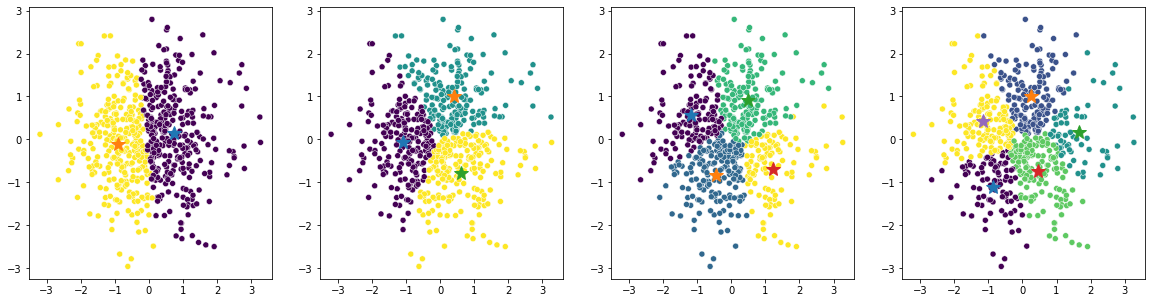

In [8]:
X, y = make_gaussian_quantiles(n_samples=610, n_features=2, n_classes=3)

K = [2, 3, 4, 5]


fig, ax = plt.subplots( 1,4, figsize=(20, 5))
i = 0
for _k in K:
    k = KMeans(_k)
    k.fit(X)
    y_kmeans = k.predict(X)
    sns.scatterplot(X[:, 0], X[:, 1],c=y_kmeans, ax= ax[i])

    centroid = k.get_centroid()
    for point in centroid:
        ax[i].plot(point[0], point[1], '*', markersize=15)
    i += 1

plt.show()

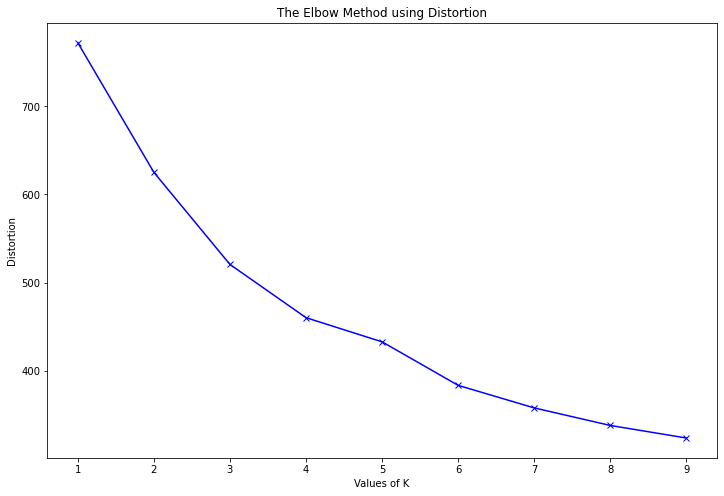

In [9]:
losses = []
K = 10
for i in range(1, K):
    kmeans_i = KMeans(n_clusters=i)
    kmeans_i.fit(X)
  # 2. Tính _hàm biến dạng_
  # 2.1. Khoảng cách tới toàn bộ centroids
    d2centroids = cdist(X, kmeans_i.get_centroid(), 'euclidean') # shape (n, k)
  # 2.2. Khoảng cách tới centroid gần nhất
    min_distance = np.min(d2centroids, axis=1) # shape (n)
    loss = np.sum(min_distance)
    losses.append(loss)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# 4, Three example k-mean doesn't work.

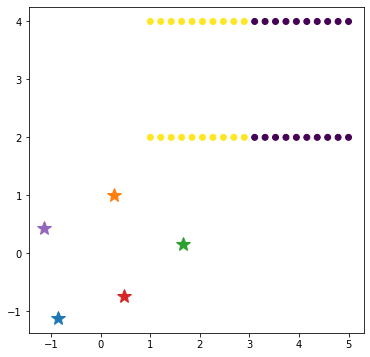

In [10]:
# Create horizantal data
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.get_centroid

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X, y, c=labels)

for point in centroid:
    ax.plot(point[0], point[1], '*', markersize=15)

plt.show()

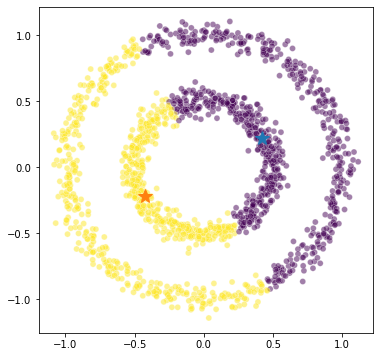

In [11]:
X,y = datasets.make_circles(factor=0.5, noise=0.05, n_samples=1500)


fig, ax = plt.subplots(figsize=(6, 6))
k = KMeans(2)
k.fit(X)
y_kmeans = k.predict(X)
sns.scatterplot(X[:, 0], X[:, 1],c=y_kmeans, palette='deep', legend= False, alpha= 0.5)

centroid = k.get_centroid()
for point in centroid:
    ax.plot(point[0], point[1], '*', markersize=15)

plt.show()

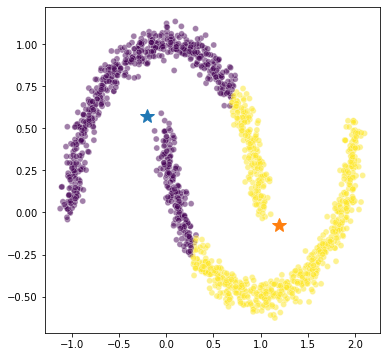

In [12]:
X,y = datasets.make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(figsize=(6, 6))
k = KMeans(2)
k.fit(X)
y_kmeans = k.predict(X)
sns.scatterplot(X[:, 0], X[:, 1],c=y_kmeans, palette='deep', legend= False, alpha= 0.5)

centroid = k.get_centroid()
for point in centroid:
    ax.plot(point[0], point[1], '*', markersize=15)

plt.show()